# Example Workflow

The aim of the ringdb package is to aid gravitational wave data analysis of confident events, by trying to shift the focus away from gathering data onto actual data analysis. 

The package will only ever download the files that are __necessary__ and that you need for your data analysis. 

This package abstracts away the database, and you can query for things you really care about, i.e. strain, PSDs posteriors, etc. There is also a way to point out particular objects in the hdf5 file structure that you might care about, and then the database will know how to look them up for any event.  

_(an exception is GWTC-1 event posteriors which come as only one zip file)_

## Initialisation of database

Let's chose the a folder called `Data` within my current directory to build out the database. 


In [2]:
from ringdb import Database

db = Database("./Data")

db.initialize() # Necessary after creating a database.

This is the new charged ringdown version -- beware!
Creating a folder at ./Data
Creating a folder at ./Data/PosteriorData
Creating a folder at ./Data/StrainData


`db.initialize()` will actually create the folder if it doesn't already exist.

This folder structure is what keeps the database persistent. You can destroy the `ringdb.Database` object and if you reinitialize with the same filepath, it will keep track of files in the folder. i.e If you ask for an event that is already downloaded in the folder, it won't redownload it. 

You can now choose a particular event that you care about

In [3]:
event = db.event("GW200129_065458")

### Posteriors

In [4]:
event.posteriors()

,chirp_mass,mass_ratio,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,theta_jn,psi,...,spin_2z_infinity_only_prec_avg,chi_eff_infinity_only_prec_avg,chi_p_infinity_only_prec_avg,beta,psi_J,cos_tilt_1_infinity_only_prec_avg,cos_tilt_2_infinity_only_prec_avg,viewing_angle,waveform_name,waveform_code
0,31.846239,0.682149,0.985334,0.557702,1.688247,0.816526,5.313423,0.228810,0.143217,2.323285,...,0.175727,0.086226,0.985013,0.378780,2.460131,0.025547,0.315091,0.143217,IMRPhenomXPHM,101
1,31.487799,0.873947,0.915827,0.720368,1.120555,2.112471,3.675797,1.500383,0.508596,1.011351,...,0.253576,0.039471,0.903847,0.133550,2.556599,-0.161215,0.352009,0.508596,IMRPhenomXPHM,101
2,31.804990,0.487876,0.929828,0.443655,1.332351,2.047138,6.048895,1.450284,0.526977,0.382508,...,-0.364801,0.080901,0.880663,0.447910,1.385921,0.320863,-0.822262,0.526977,IMRPhenomXPHM,101
3,28.427027,0.426423,0.964476,0.251905,1.795112,0.890402,4.833604,3.165505,0.355251,1.817409,...,0.140192,-0.103027,0.942058,0.559276,4.434716,-0.214356,0.556526,0.355251,IMRPhenomXPHM,101
4,32.496616,0.810974,0.879500,0.783592,1.767692,0.583345,4.215762,2.543916,0.888341,0.765973,...,0.643088,0.197865,0.864226,0.218916,2.594730,-0.185560,0.820693,0.888341,IMRPhenomXPHM,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87424,31.134275,0.667861,0.953949,0.903379,1.194464,2.416172,5.543021,1.346494,0.389191,1.454303,...,-0.775579,-0.060459,0.857911,0.386750,1.586816,0.437278,-0.858531,0.389191,IMRPhenomXPHM,101
87425,33.684972,0.993382,0.019507,0.828644,2.597558,1.084170,3.505422,1.479357,1.003579,1.480813,...,0.387186,0.184740,0.727086,0.166169,3.031292,-0.839014,0.467253,1.003579,IMRPhenomXPHM,101
87426,33.711425,0.978513,0.874193,0.147709,1.189354,0.880513,5.823910,1.069528,0.743751,0.388727,...,-0.128482,0.210997,0.684958,0.211304,1.770432,0.621352,-0.869827,0.743751,IMRPhenomXPHM,101
87427,31.753999,0.647918,0.690898,0.260967,1.394152,1.062907,5.280950,2.636087,0.593998,0.825907,...,0.055397,0.123575,0.670224,0.263338,2.878151,0.242798,0.212275,0.593998,IMRPhenomXPHM,101


Note that if you ask for the posteriors again, they will not be redownloaded

In [5]:
event.posteriors()

,chirp_mass,mass_ratio,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,theta_jn,psi,...,spin_2z_infinity_only_prec_avg,chi_eff_infinity_only_prec_avg,chi_p_infinity_only_prec_avg,beta,psi_J,cos_tilt_1_infinity_only_prec_avg,cos_tilt_2_infinity_only_prec_avg,viewing_angle,waveform_name,waveform_code
0,31.846239,0.682149,0.985334,0.557702,1.688247,0.816526,5.313423,0.228810,0.143217,2.323285,...,0.175727,0.086226,0.985013,0.378780,2.460131,0.025547,0.315091,0.143217,IMRPhenomXPHM,101
1,31.487799,0.873947,0.915827,0.720368,1.120555,2.112471,3.675797,1.500383,0.508596,1.011351,...,0.253576,0.039471,0.903847,0.133550,2.556599,-0.161215,0.352009,0.508596,IMRPhenomXPHM,101
2,31.804990,0.487876,0.929828,0.443655,1.332351,2.047138,6.048895,1.450284,0.526977,0.382508,...,-0.364801,0.080901,0.880663,0.447910,1.385921,0.320863,-0.822262,0.526977,IMRPhenomXPHM,101
3,28.427027,0.426423,0.964476,0.251905,1.795112,0.890402,4.833604,3.165505,0.355251,1.817409,...,0.140192,-0.103027,0.942058,0.559276,4.434716,-0.214356,0.556526,0.355251,IMRPhenomXPHM,101
4,32.496616,0.810974,0.879500,0.783592,1.767692,0.583345,4.215762,2.543916,0.888341,0.765973,...,0.643088,0.197865,0.864226,0.218916,2.594730,-0.185560,0.820693,0.888341,IMRPhenomXPHM,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87424,31.134275,0.667861,0.953949,0.903379,1.194464,2.416172,5.543021,1.346494,0.389191,1.454303,...,-0.775579,-0.060459,0.857911,0.386750,1.586816,0.437278,-0.858531,0.389191,IMRPhenomXPHM,101
87425,33.684972,0.993382,0.019507,0.828644,2.597558,1.084170,3.505422,1.479357,1.003579,1.480813,...,0.387186,0.184740,0.727086,0.166169,3.031292,-0.839014,0.467253,1.003579,IMRPhenomXPHM,101
87426,33.711425,0.978513,0.874193,0.147709,1.189354,0.880513,5.823910,1.069528,0.743751,0.388727,...,-0.128482,0.210997,0.684958,0.211304,1.770432,0.621352,-0.869827,0.743751,IMRPhenomXPHM,101
87427,31.753999,0.647918,0.690898,0.260967,1.394152,1.062907,5.280950,2.636087,0.593998,0.825907,...,0.055397,0.123575,0.670224,0.263338,2.878151,0.242798,0.212275,0.593998,IMRPhenomXPHM,101


Now you can query a bunch of things from the `Event` object. The most important are:

- `event.posteriors()` $\rightarrow$ pandas Dataframe with all the posterior samples
- `event.psd()` $\rightarrow$ dictionary of `ringdown.PowerSpectrum` objects (from the [ringdown package](https://github.com/maxisi/ringdown)) for each detector
- `event.strain()` $\rightarrow$ dictionary of `ringdown.Data` objects (from the [ringdown package](https://github.com/maxisi/ringdown)) for each detector

### PSDs


In [9]:
event.psd()['H1']

0.000       2.500000e-01
0.125       2.500000e-01
0.250       2.500000e-01
0.375       2.500000e-01
0.500       2.500000e-01
                ...     
1023.380    2.150260e-47
1023.500    2.143040e-47
1023.620    2.135970e-47
1023.750    2.128990e-47
1023.880    1.818510e-47
Length: 8192, dtype: float64

This just outputs the psd as provided, with no processing done at all:

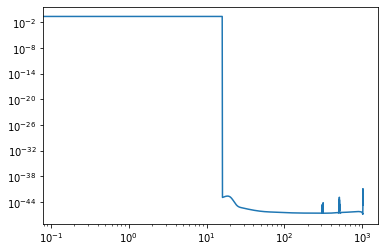

In [10]:
import matplotlib.pyplot as plt
plt.loglog(event.psd()['L1'])

### Strain

In [11]:
event.strain()

{'H1': 1.264316e+09    1.045621e-21
 1.264316e+09    1.718937e-20
 1.264316e+09    9.492550e-21
 1.264316e+09    5.866483e-21
 1.264316e+09    1.246175e-20
                     ...     
 1.264316e+09   -2.723655e-20
 1.264316e+09   -3.753662e-20
 1.264316e+09   -2.930611e-20
 1.264316e+09   -2.483196e-20
 1.264316e+09   -4.115431e-20
 Length: 524288, dtype: float64,
 'L1': 1.264316e+09   -1.058750e-18
 1.264316e+09   -1.085531e-18
 1.264316e+09   -1.064318e-18
 1.264316e+09   -1.077611e-18
 1.264316e+09   -1.087123e-18
                     ...     
 1.264316e+09   -4.721298e-19
 1.264316e+09   -4.736185e-19
 1.264316e+09   -4.736105e-19
 1.264316e+09   -4.674924e-19
 1.264316e+09   -4.649724e-19
 Length: 524288, dtype: float64,
 'V1': 1.264316e+09    3.391172e-19
 1.264316e+09    3.176835e-19
 1.264316e+09    3.351224e-19
 1.264316e+09    3.212128e-19
 1.264316e+09    2.878164e-19
                     ...     
 1.264316e+09    2.280177e-19
 1.264316e+09    1.828479e-19
 1.264316e+09   

<AxesSubplot:>

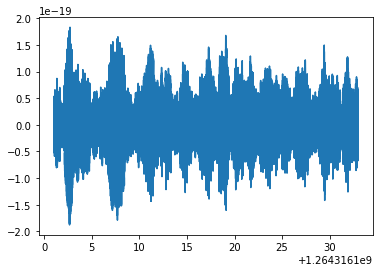

In [12]:
event.strain()['H1'].plot()